# ECONOMÍA FINANCIERA

<div class="alert alert-block alert-success">
<b>Apellidos y nombres:</b> Yali Samaniego, Roy Marco
    <br>
<b>Correo:</b> ryali93@gmail.com
</div>

In [21]:
library(quantmod)
library(PerformanceAnalytics)
library(tseries)
library(urca)
library(ggplot2)
library(gridExtra)

## Pregunta 1, nivel básico, sesión 1
Descargar y graficar los precios Open, High, Low y Close de la acción (stock) de la acción de MICROSOFT, analice. Ayuda: El nombre financiero (ticker) de la acción de MICROSOFT es MSFT.

[1] "MSFT"

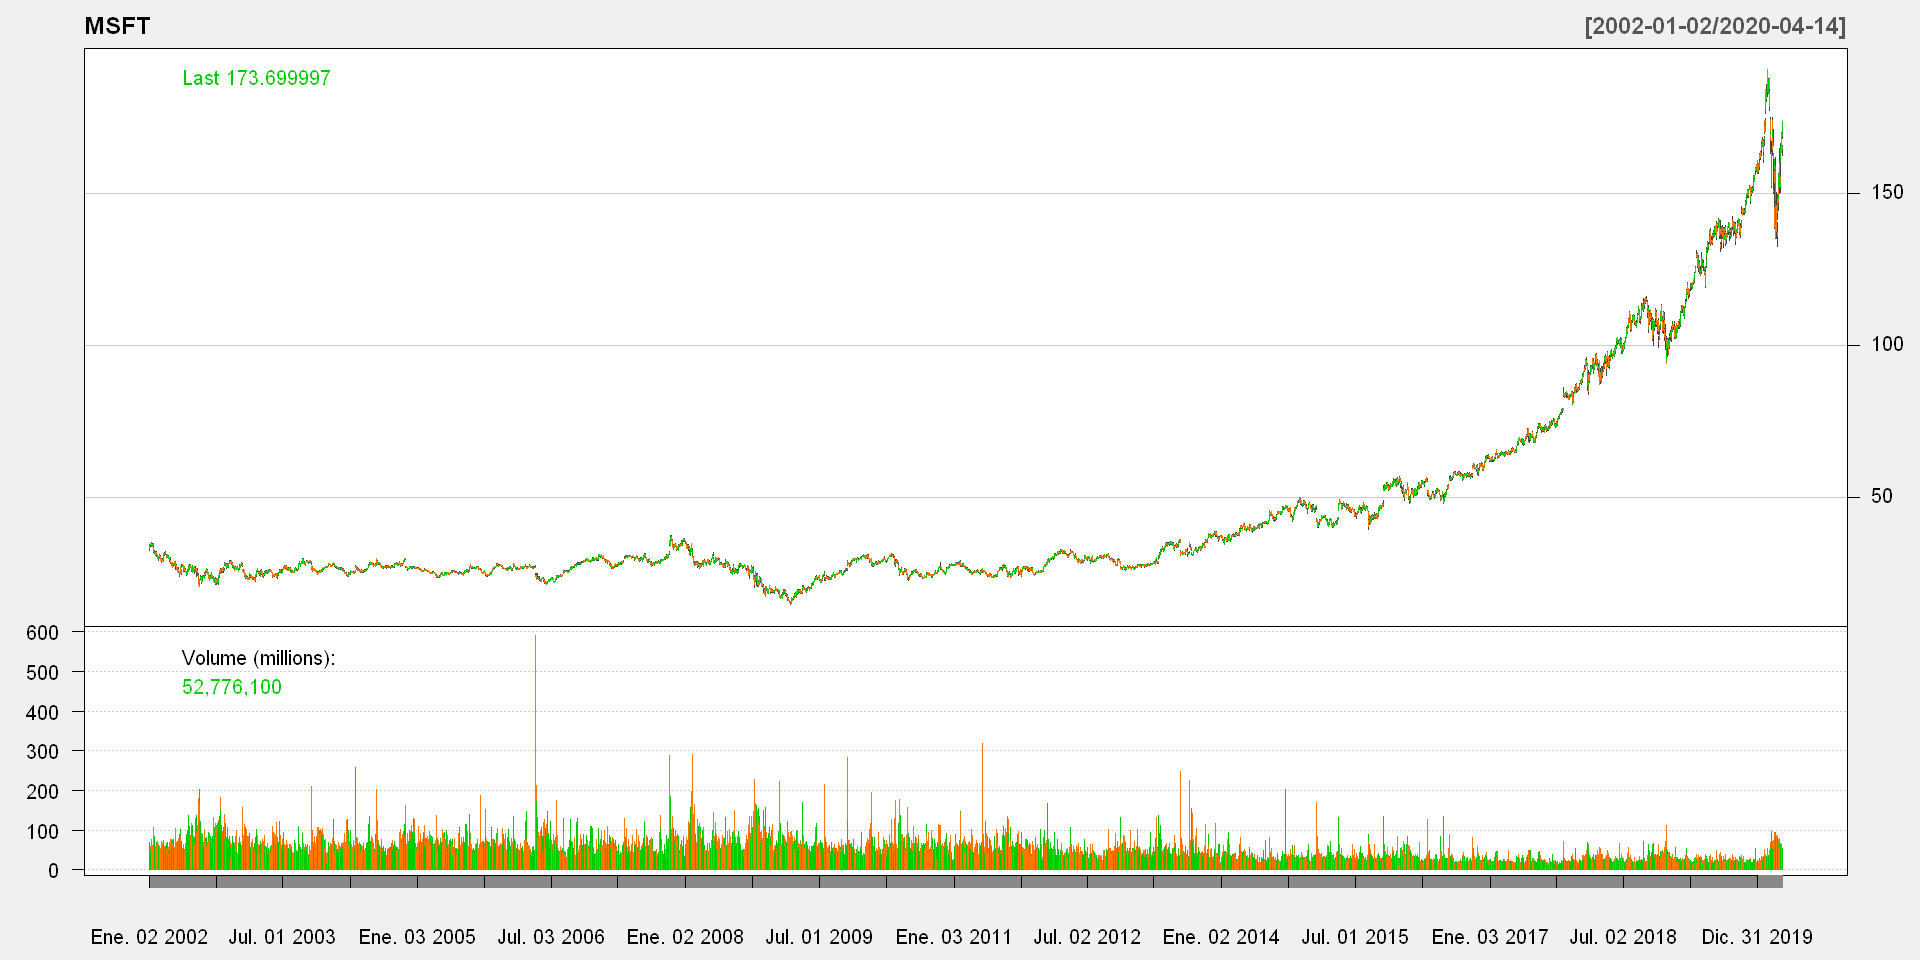

In [16]:
getSymbols.yahoo('MSFT', env = globalenv(), return.class = "xts", from = '2002-01-01', to=Sys.Date(), periodicity = 'daily')
chartSeries(MSFT, theme="white")

<div class="alert alert-block alert-info">
<b>Análisis:</b> Esta serie de tiempo de precios de las acciones de Microsoft muestra una la volatilidad e incremento de los  precios, aproximadamente desde 2011 con una tendencia exponencial. Tiene períodos de baja en el año 2014, 2016 y una gran caída en el presente año a causa de la pandemia mundial, con una ligera tendencia a normalizarse en los últimos días.
</div>

## Pregunta 2, nivel básico, sesión 1
Descargar y graficar los precios Open, High, Low y Close de la acción (stock) de la acción de TESLA, extraer y separar solo el precio Close, presentar en dos gráficos separados, a la izquierda los cuatro precios mencionados y a la derecha el precio Close, analice. Ayuda: El ticker de la acción de TESLA es TSLA.

In [98]:
getSymbols.yahoo('TSLA', env = globalenv(), return.class = "xts", from = '2012-01-01', to=Sys.Date(), periodicity = 'monthly')

[1] "TSLA"

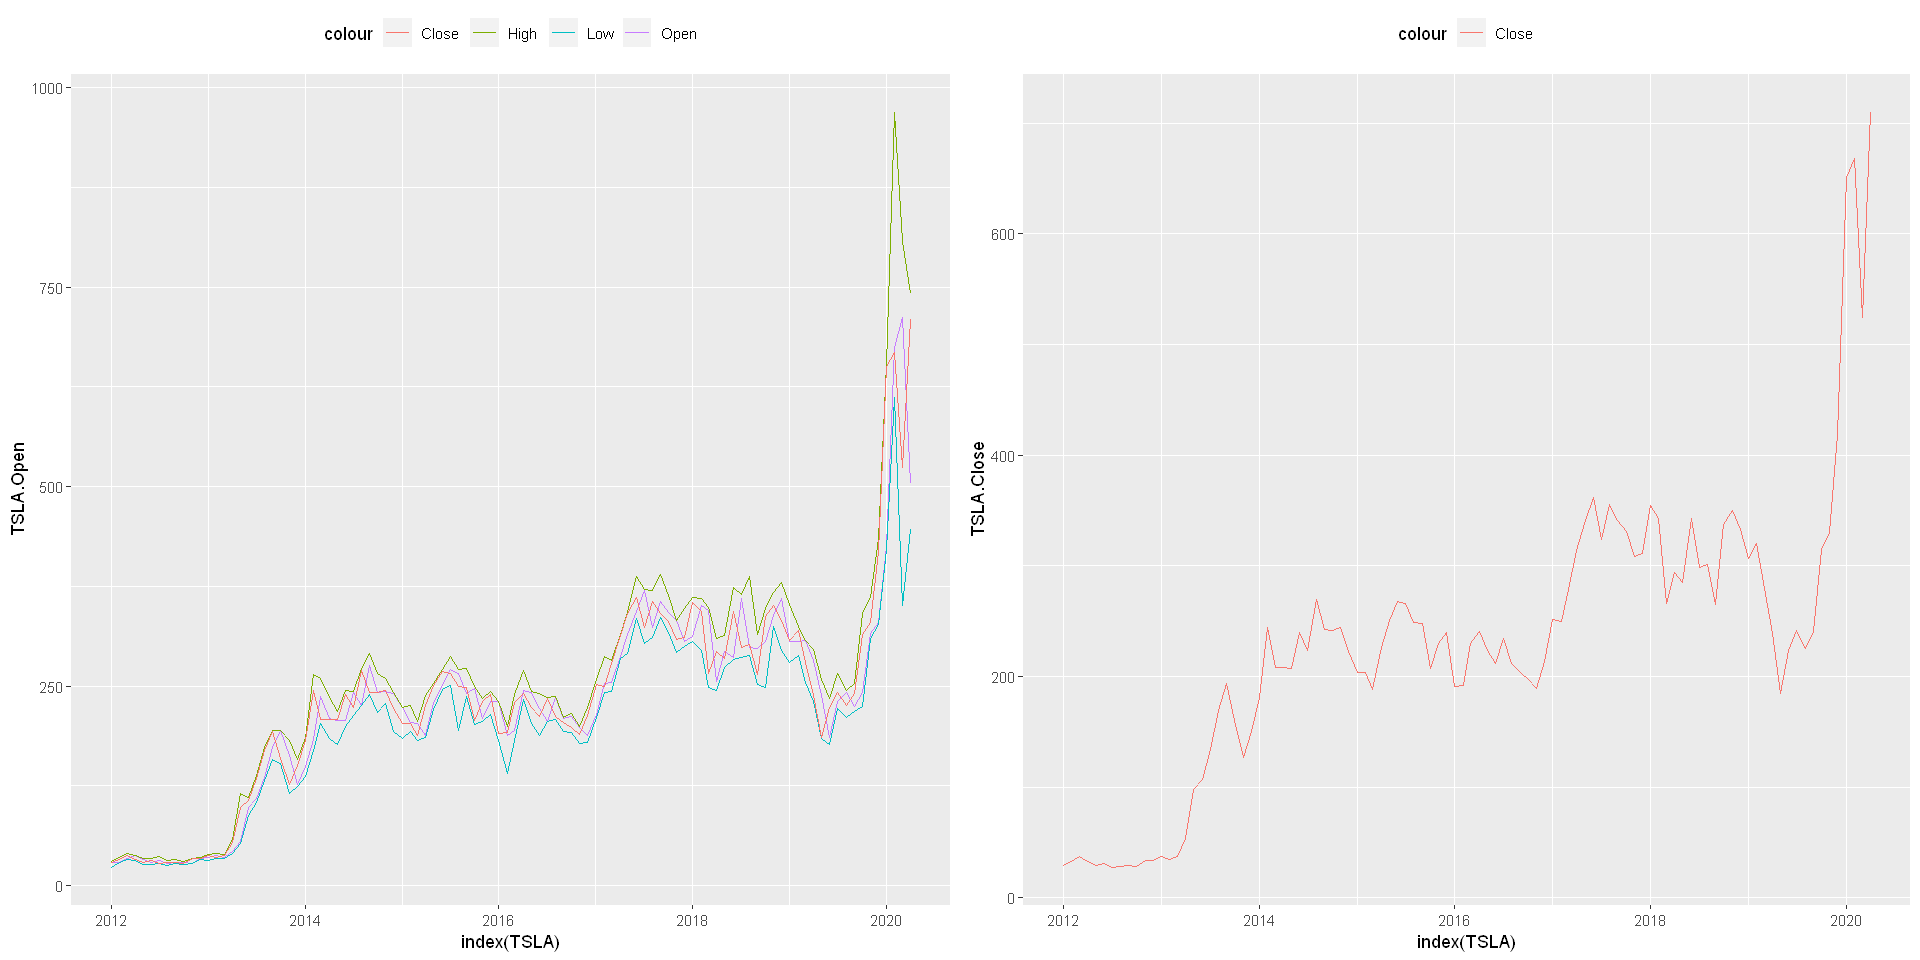

In [104]:
plot1 <- ggplot(TSLA, aes(x=index(TSLA))) +
    geom_line(aes(y=TSLA.Open, color="Open")) +
    geom_line(aes(y=TSLA.High, color="High")) +
    geom_line(aes(y=TSLA.Low, color="Low")) +
    geom_line(aes(y=TSLA.Close, color="Close")) +
    theme(legend.position="top")

plot2 <- ggplot(TSLA, aes(x=index(TSLA))) +
    geom_line(aes(y=TSLA.Close, color="Close")) +
    theme(legend.position="top")

grid.arrange(plot1, plot2, ncol=2)

<div class="alert alert-block alert-info">
<b>Análisis:</b> Si bien TESLA se funda en 2003, a partir de los movimientos del 2011, se ve un crecimiento en los años siguientes. Estas series nos muestran un crecimiento acelerado aproximado en el año 2013, de aquí se ve un incremento en sus precios promedios, así como la volatilidad, a mediados del 2019 tuvo una caída algo fuerte y una recuperación exponencial en la segunda mitad del 2019 hasta inicios del presente año, su última caida de este año se debe al igual que Microsoft a la pandemia mundial.
</div>

## Pregunta 3, nivel básico, sesión 1
Descargar la serie de precios de la acción de APLE y transformar la misma serie de precios Close de la acción de APLE en sus retornos, presentar la gráfica de la serie de precios arriba y la serie de los retornos abajo, analice.

In [77]:
getSymbols.yahoo('AAPL', env = globalenv(), return.class = "xts", from = '2002-01-01', to=Sys.Date(), periodicity = 'daily')

AAPL_Ret = Return.calculate(AAPL$AAPL.Close, method = "compound")
AAPL_Ret = AAPL_Ret[-1,]

[1] "AAPL"

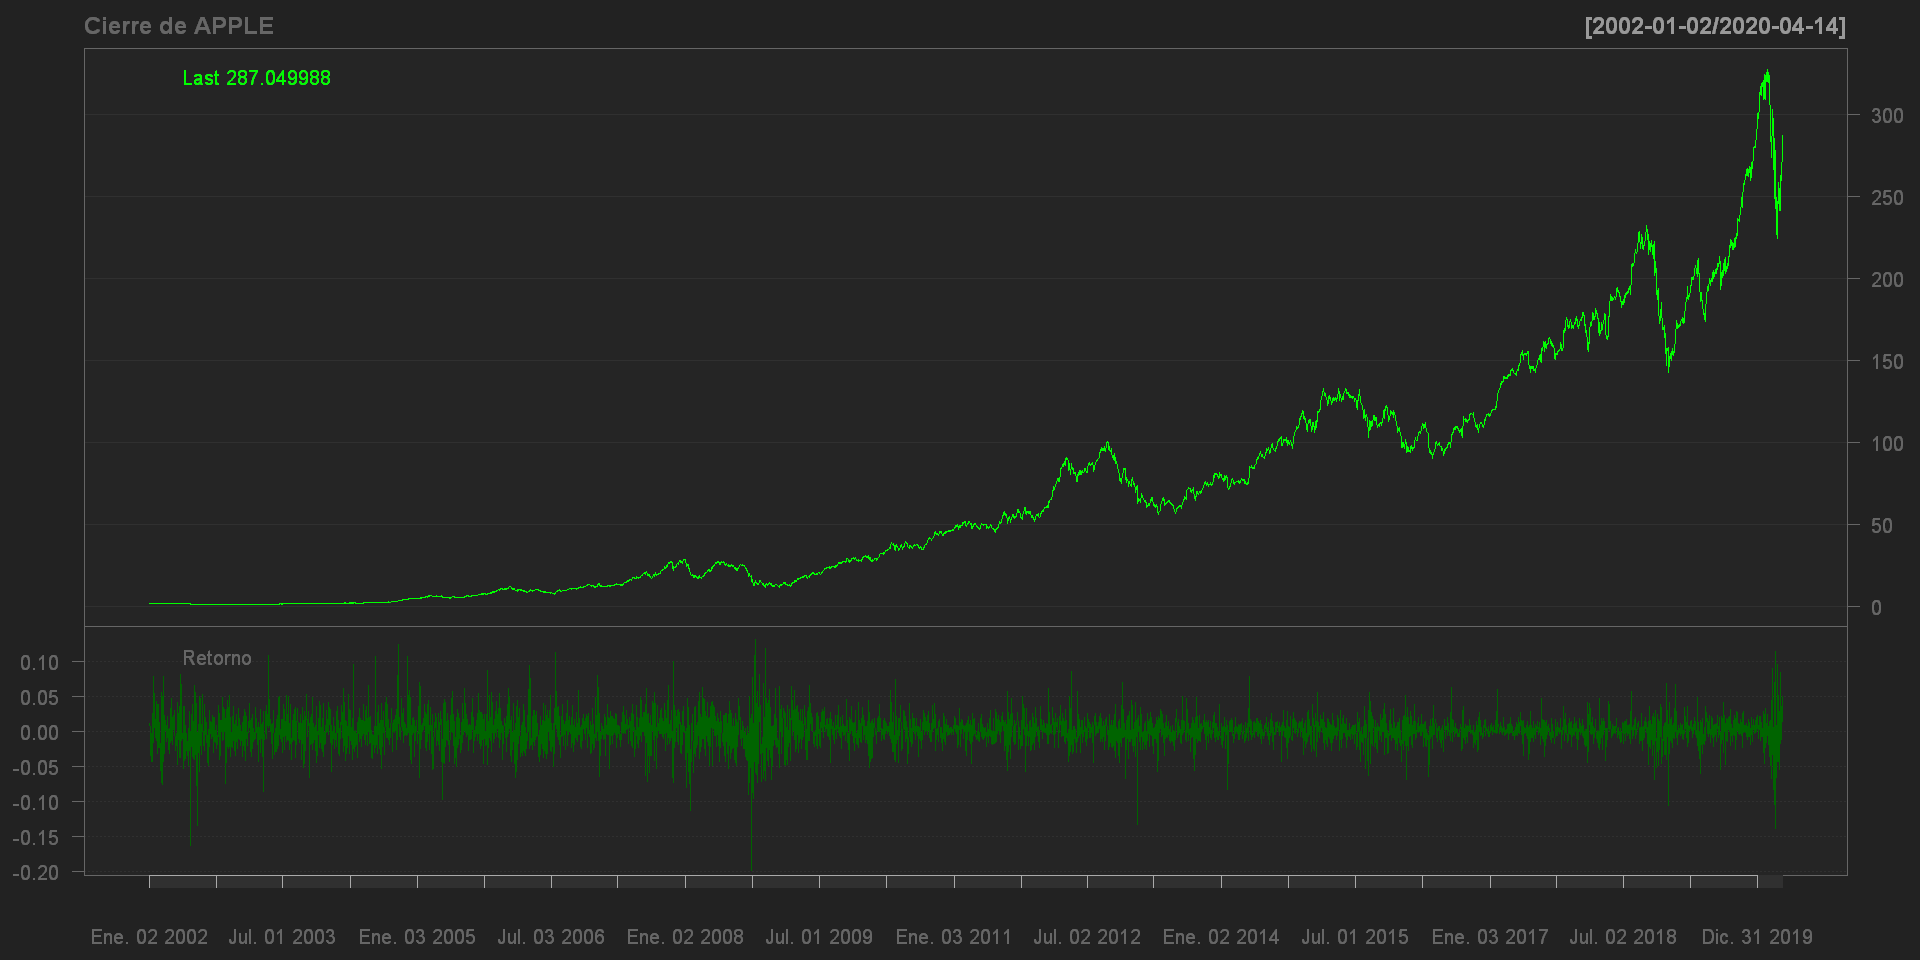

In [79]:
chartSeries(AAPL$AAPL.Close, name = "Cierre de APPLE")
addTA(AAPL_Ret, on=NA, col = "darkgreen", legend="Retorno")

<div class="alert alert-block alert-info">
<b>Análisis:</b> Estas series muestran una tendencia positiva desde el año 2005 aproximadamente, tiene una fuerte volatilidad entre los años 2011 y 2012 y una tendencia exponencial. Tiene grandes caídas en sus acciones en los años 2018 y 2020.</div>

---

## Pregunta 1, nivel intermedio, sesión 1
Muestre si la serie de precios (serie en niveles) Close de la acción de Coca Cola (KO), del índice bursátil de Alemania (DAX) y del tipo de cambio EURUSD tiene una Raiz Unitaria (RU), trasforme la serie en retornos y vuelva a estudiar la presencia de RU.

In [82]:
getSymbols.yahoo("KO", env = globalenv(), return.class = "xts", from = '2019-01-01', to=Sys.Date())
getSymbols.yahoo("DAX", env = globalenv(), return.class = "xts", from = '2019-01-01', to=Sys.Date())
getFX("EUR/USD")

KO_Ret = Return.calculate(KO$KO.Close, method = "compound")
DAX_Ret = Return.calculate(DAX$DAX.Close, method = "compound")
EURUSD_Ret = Return.calculate(EURUSD, method = "compound")

[1] "KO"

[1] "DAX"

[1] "EUR/USD"

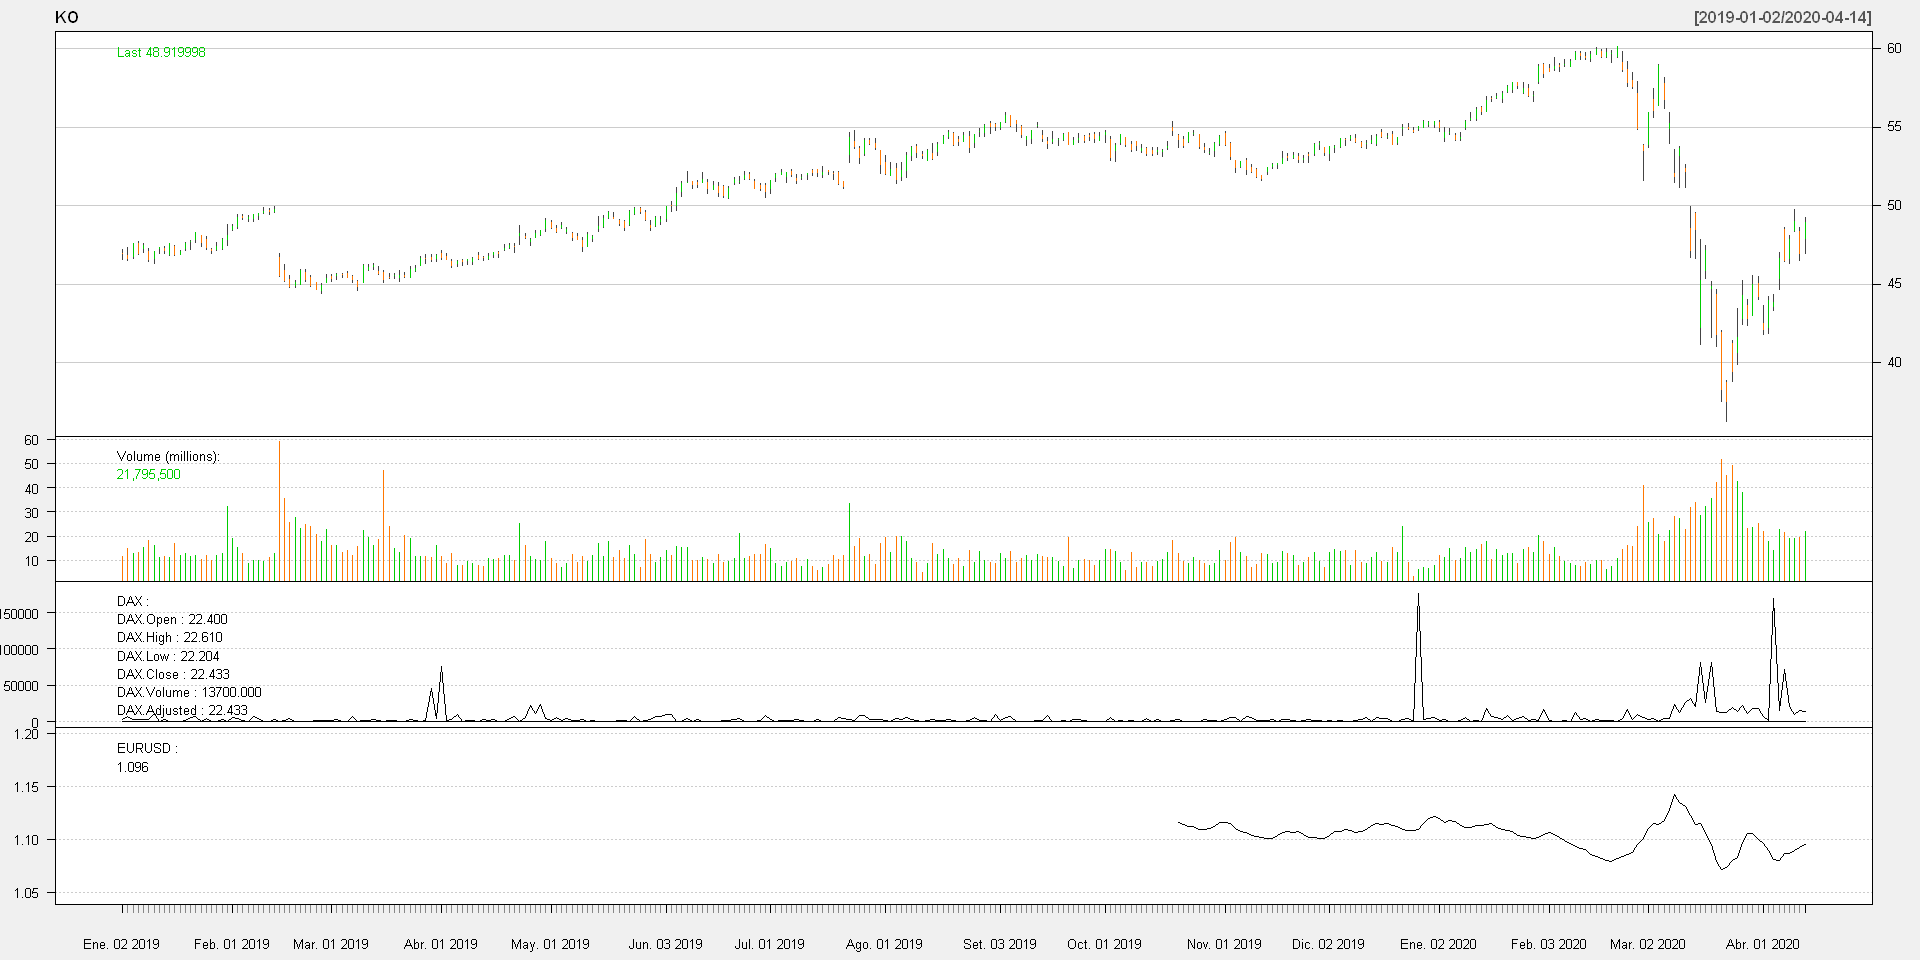

In [86]:
chartSeries(KO, theme = "white")
addTA(DAX)
addTA(EURUSD)

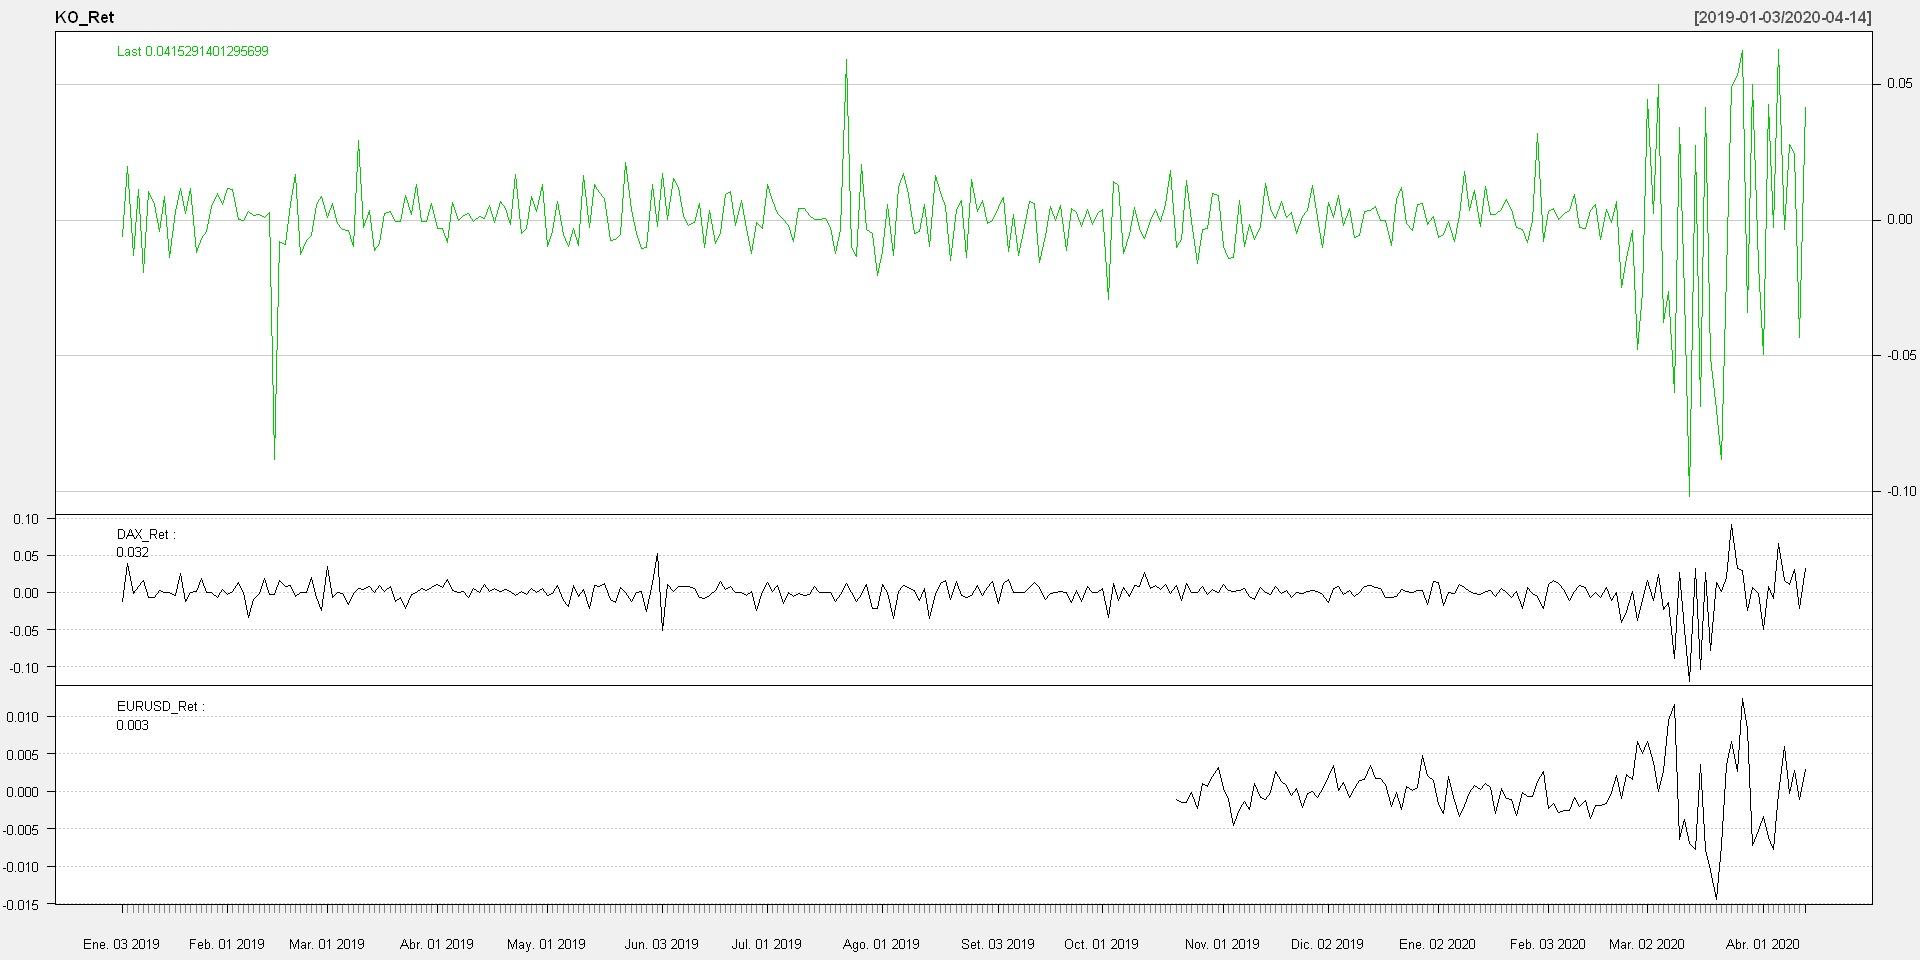

In [88]:
chartSeries(KO_Ret, theme = "white")
addTA(DAX_Ret)
addTA(EURUSD_Ret)

In [94]:
# Verificando la presencia de raiz unitaria
KO_adf <- adf.test(diff(KO$KO.Close)[-1], alternative = "stationary")
DAX_adf <- adf.test(diff(DAX$DAX.Close)[-1], alternative = "stationary")
EURUSD_adf <- adf.test(diff(EURUSD)[-1], alternative = "stationary")

In [103]:
KO_adf
DAX_adf
EURUSD_adf


	Augmented Dickey-Fuller Test

data:  diff(KO$KO.Close)[-1]
Dickey-Fuller = -5.4289, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(DAX$DAX.Close)[-1]
Dickey-Fuller = -6.0565, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(EURUSD)[-1]
Dickey-Fuller = -5.4028, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


In [96]:
# Verificando la presencia de raiz unitaria a los retornos
KO_Ret_adf <- adf.test(diff(KO_Ret[-1,])[-1,], alternative = "stationary")
DAX_Ret_adf <- adf.test(diff(DAX_Ret[-1,])[-1,], alternative = "stationary")
EURUSD_Ret_adf <- adf.test(diff(EURUSD_Ret[-1,])[-1,], alternative = "stationary")

In [105]:
KO_Ret_adf
DAX_Ret_adf
EURUSD_Ret_adf


	Augmented Dickey-Fuller Test

data:  diff(KO_Ret[-1, ])[-1, ]
Dickey-Fuller = -11.215, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(DAX_Ret[-1, ])[-1, ]
Dickey-Fuller = -9.8321, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(EURUSD_Ret[-1, ])[-1, ]
Dickey-Fuller = -7.716, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


<div class="alert alert-block alert-info">
<b>Análisis:</b> 
    <br>Ninguna de las series tiene raíz unitaria por tener un resultado del test dicker fuller negativo y un grado de significancia menor a 0.05, entonces se concluyen que son estacionarias.
    <br>De la misma forma, para los retornos también tienen valores negativos y no tienen raíces unitarias.
</div>

## Pregunta 2, nivel intermedio, sesión 1
Encuentre el orden de integración de cada una de las series estudiadas anteriormente y realice una comparación entre los correlogramas de cada series tanto en niveles como en retornos (u opcionalmente en primeras diferencias).

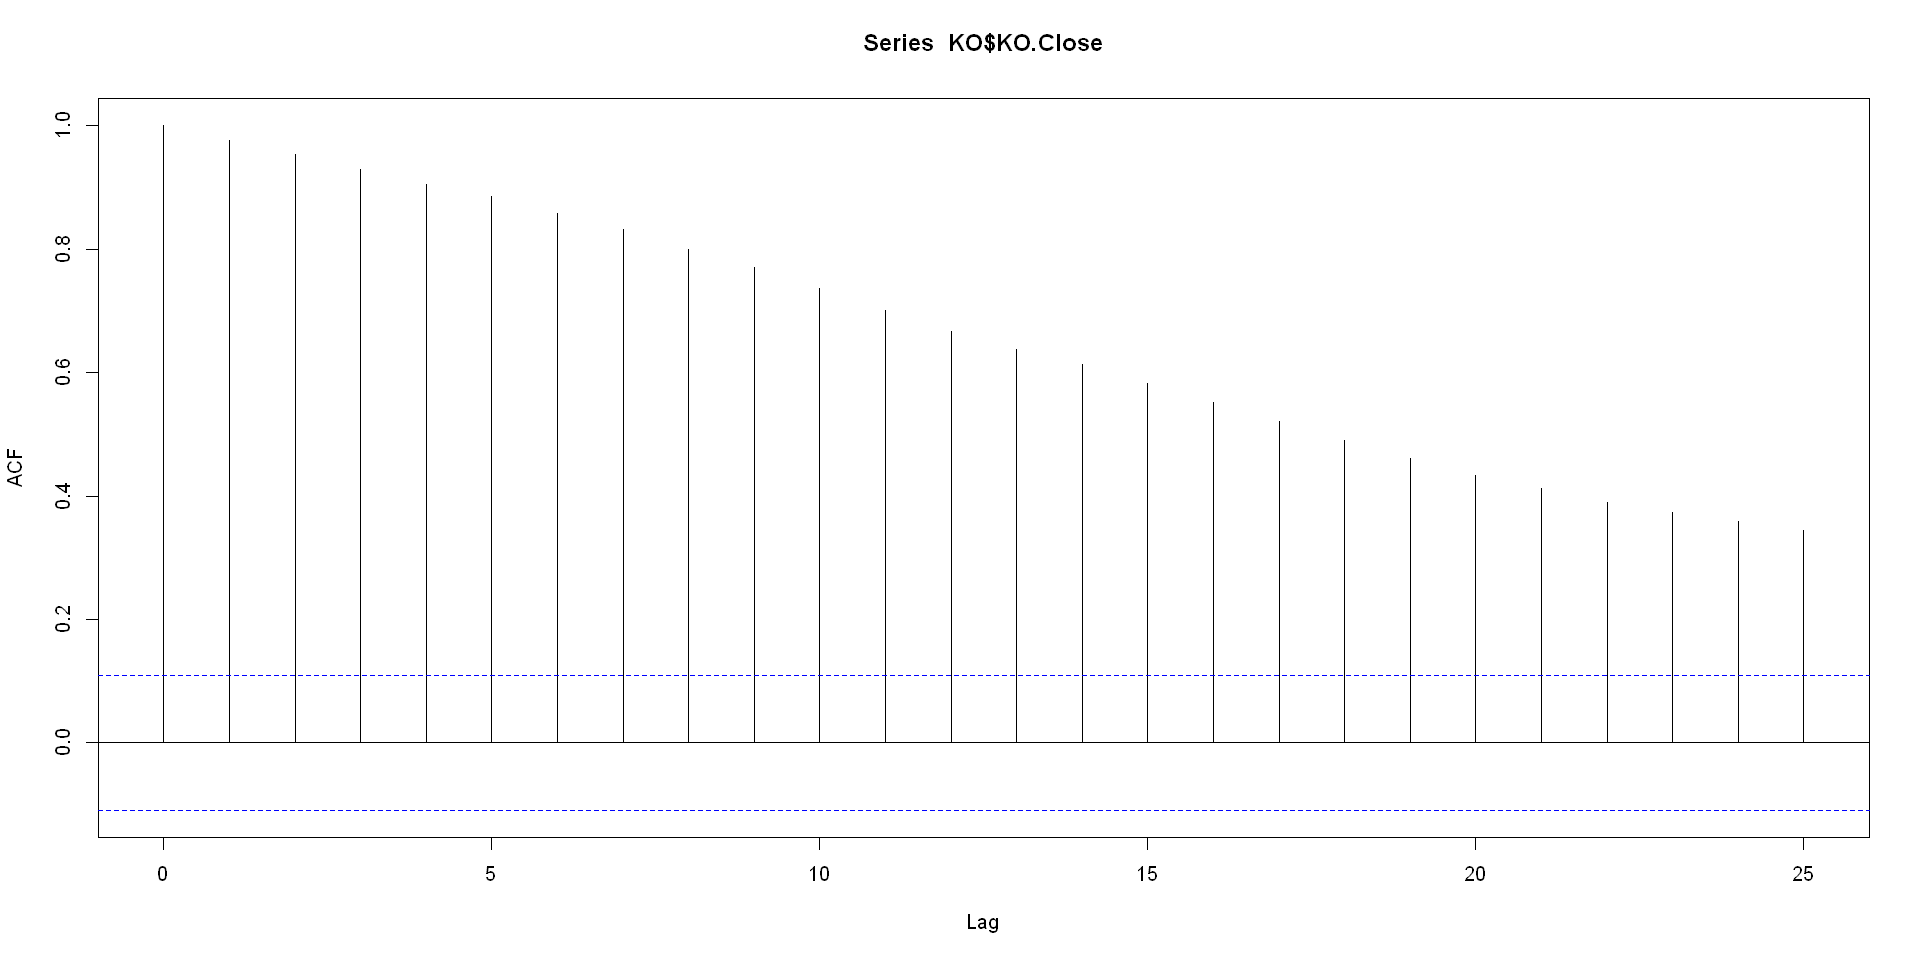

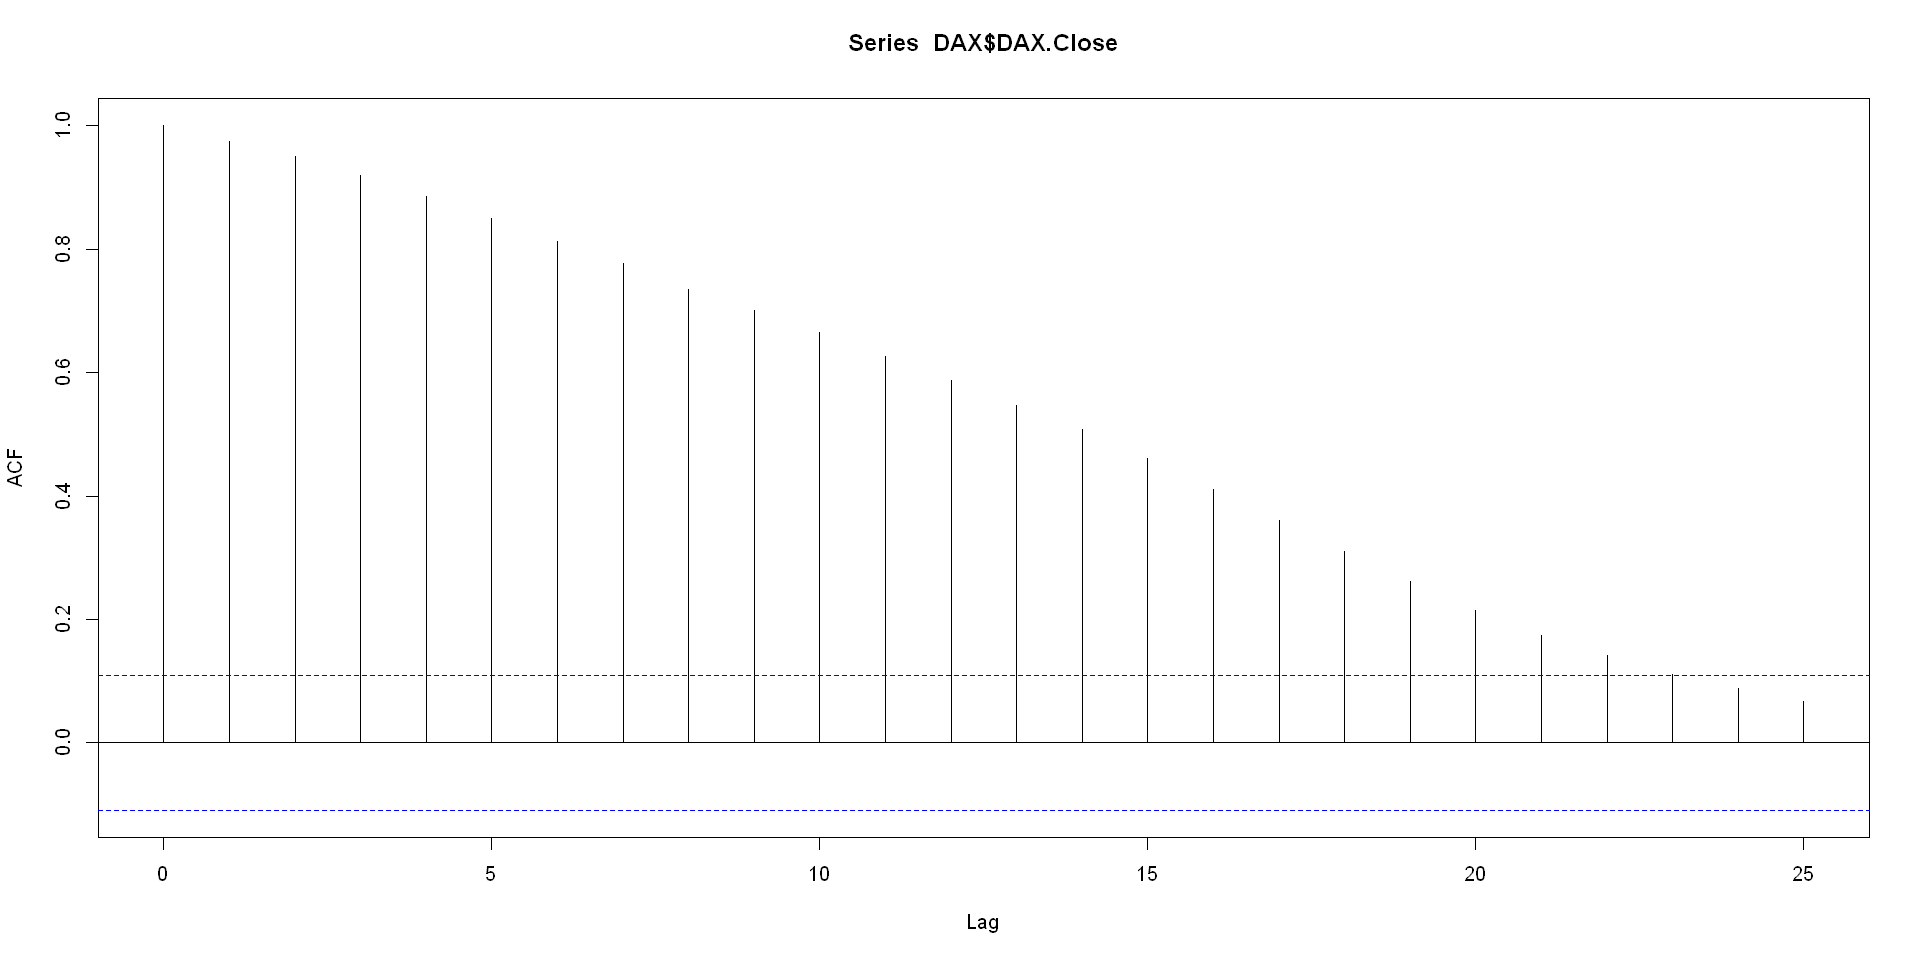

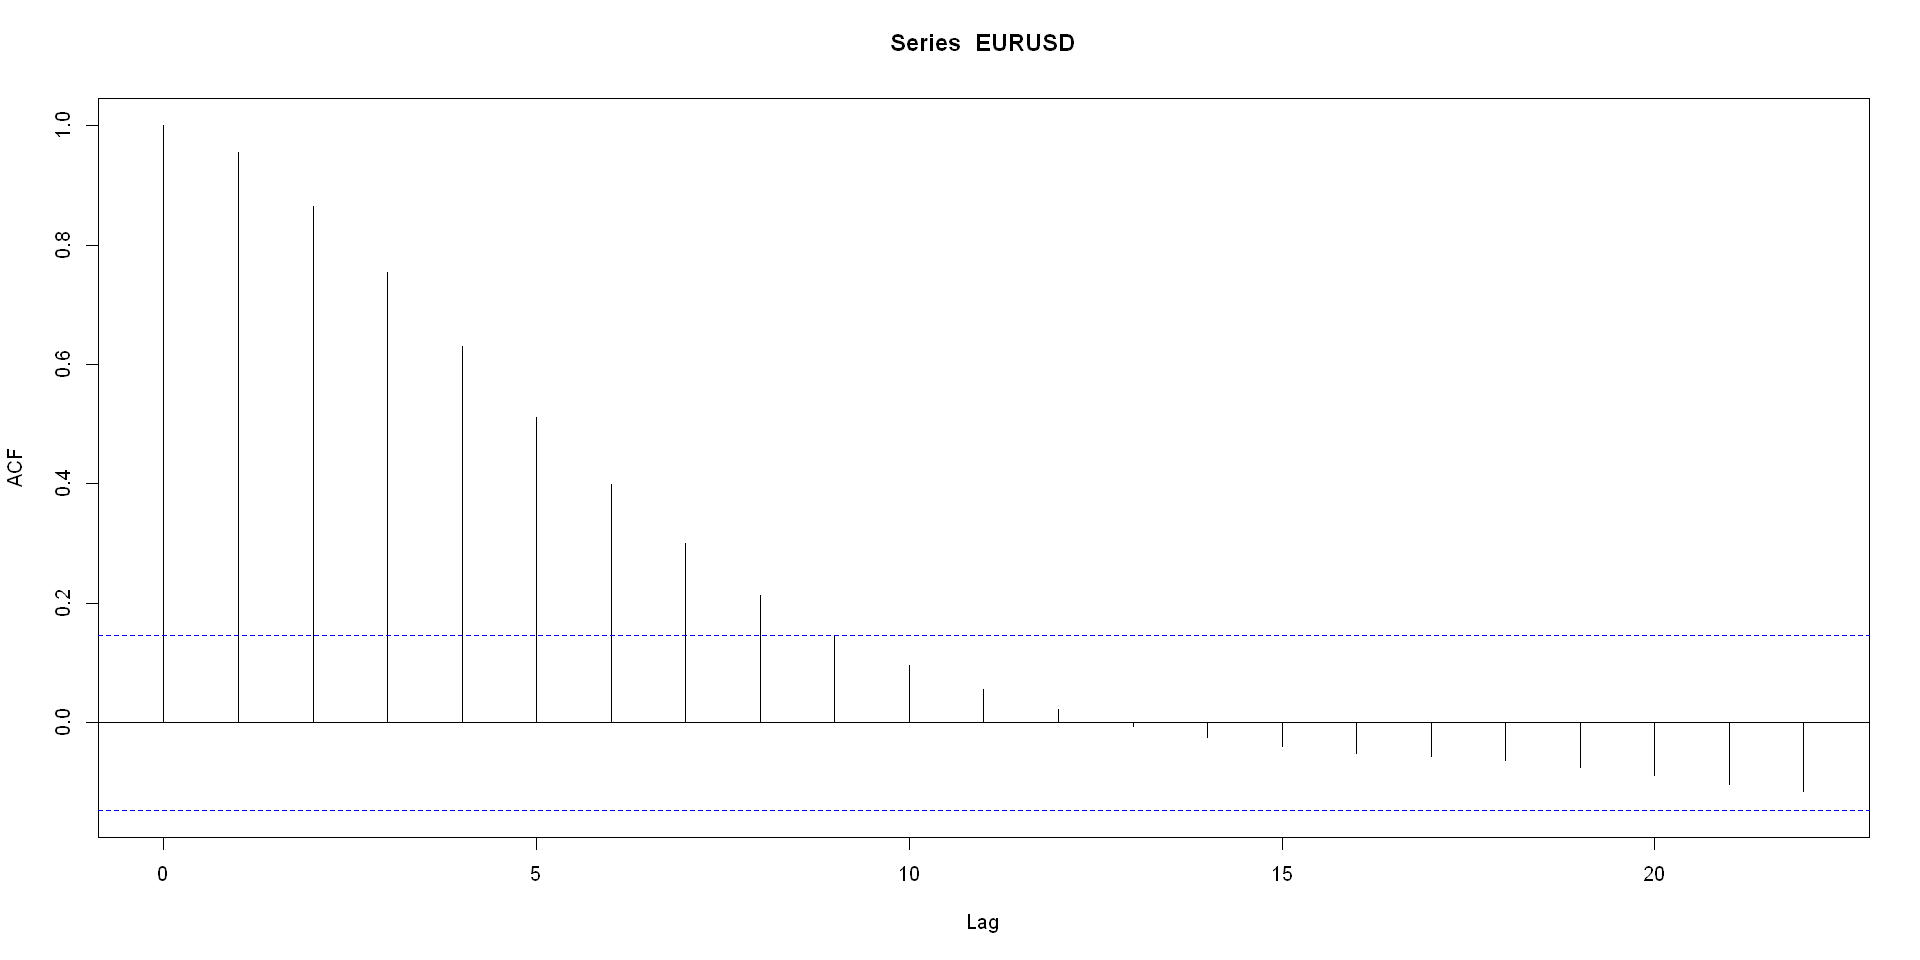

In [107]:
acf(KO$KO.Close)
acf(DAX$DAX.Close)
acf(EURUSD)

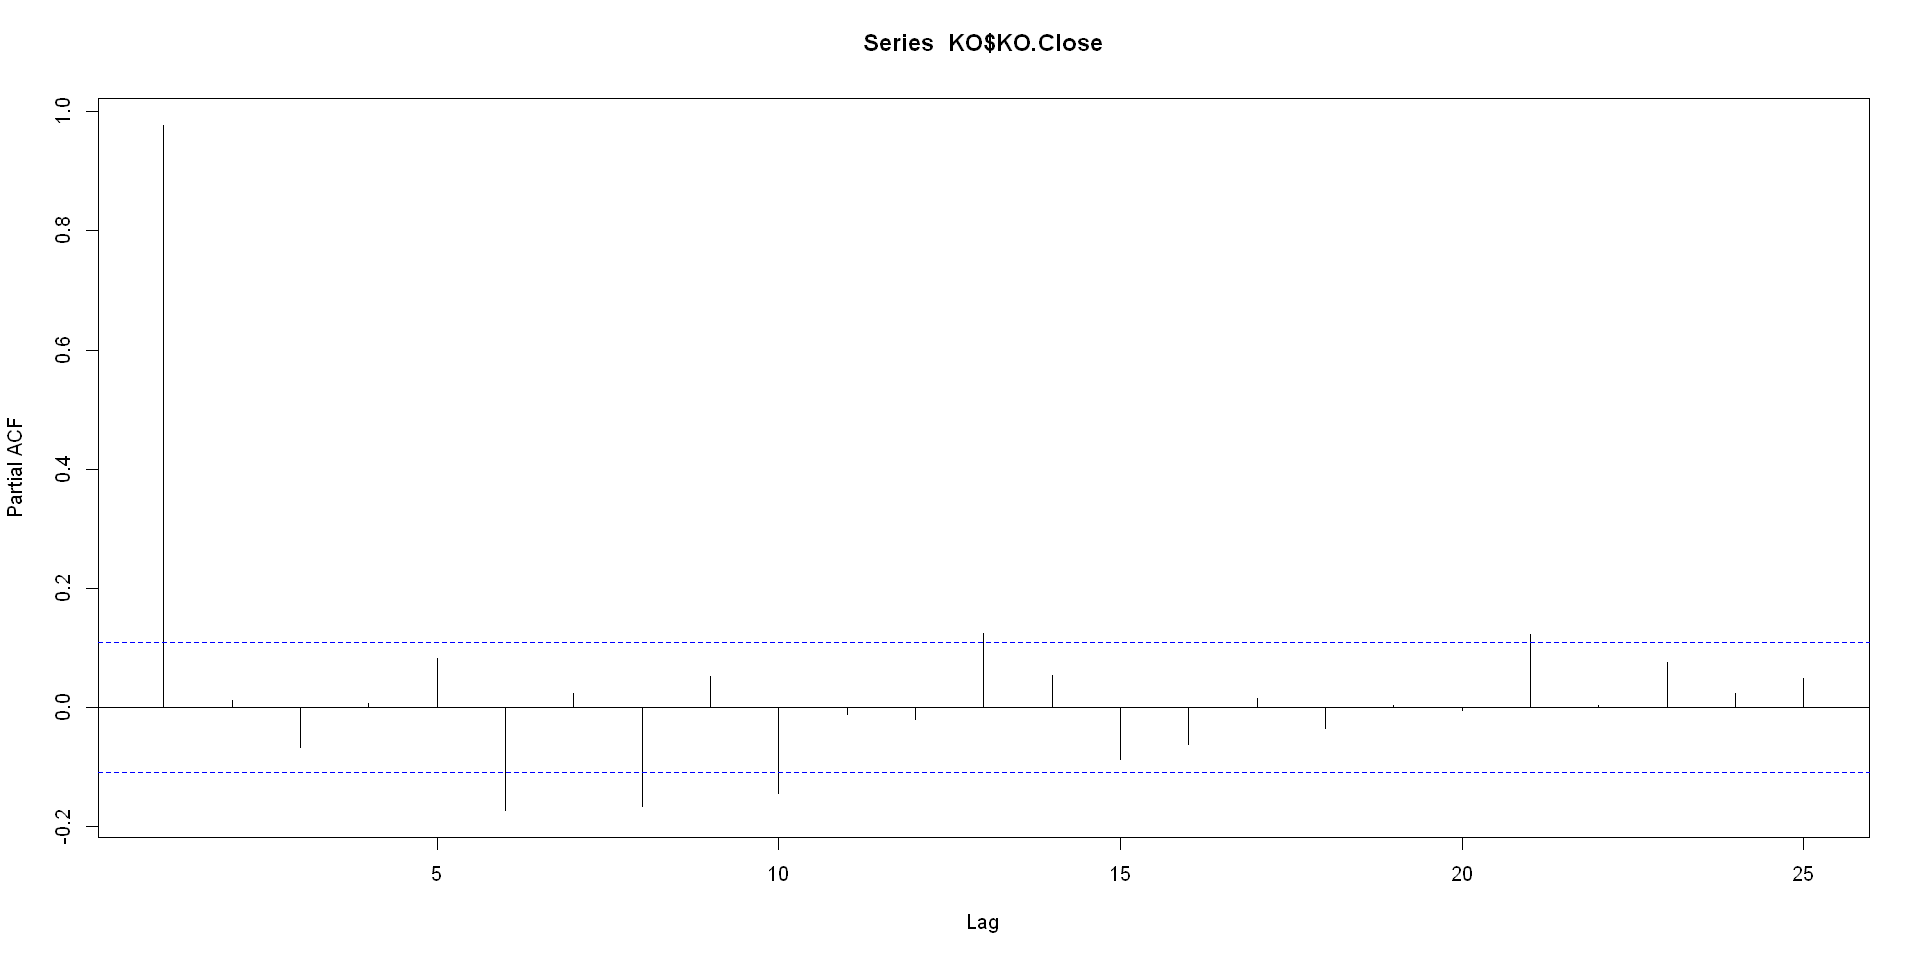

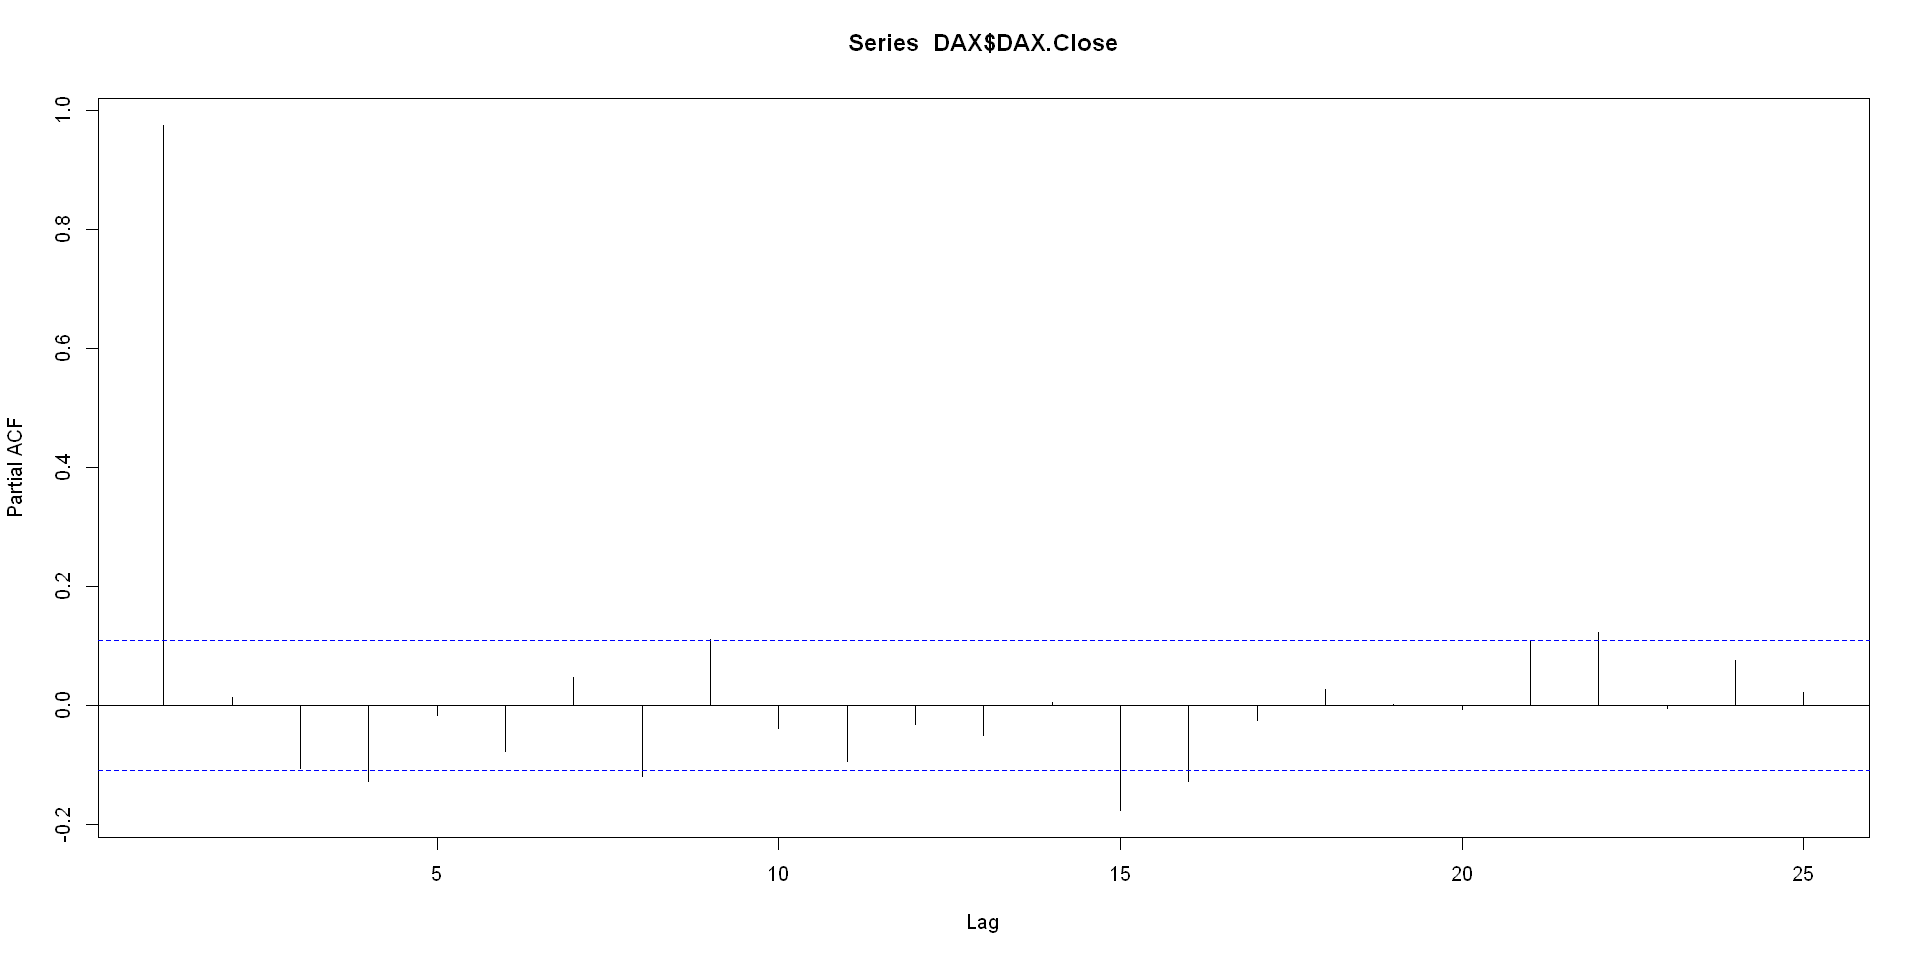

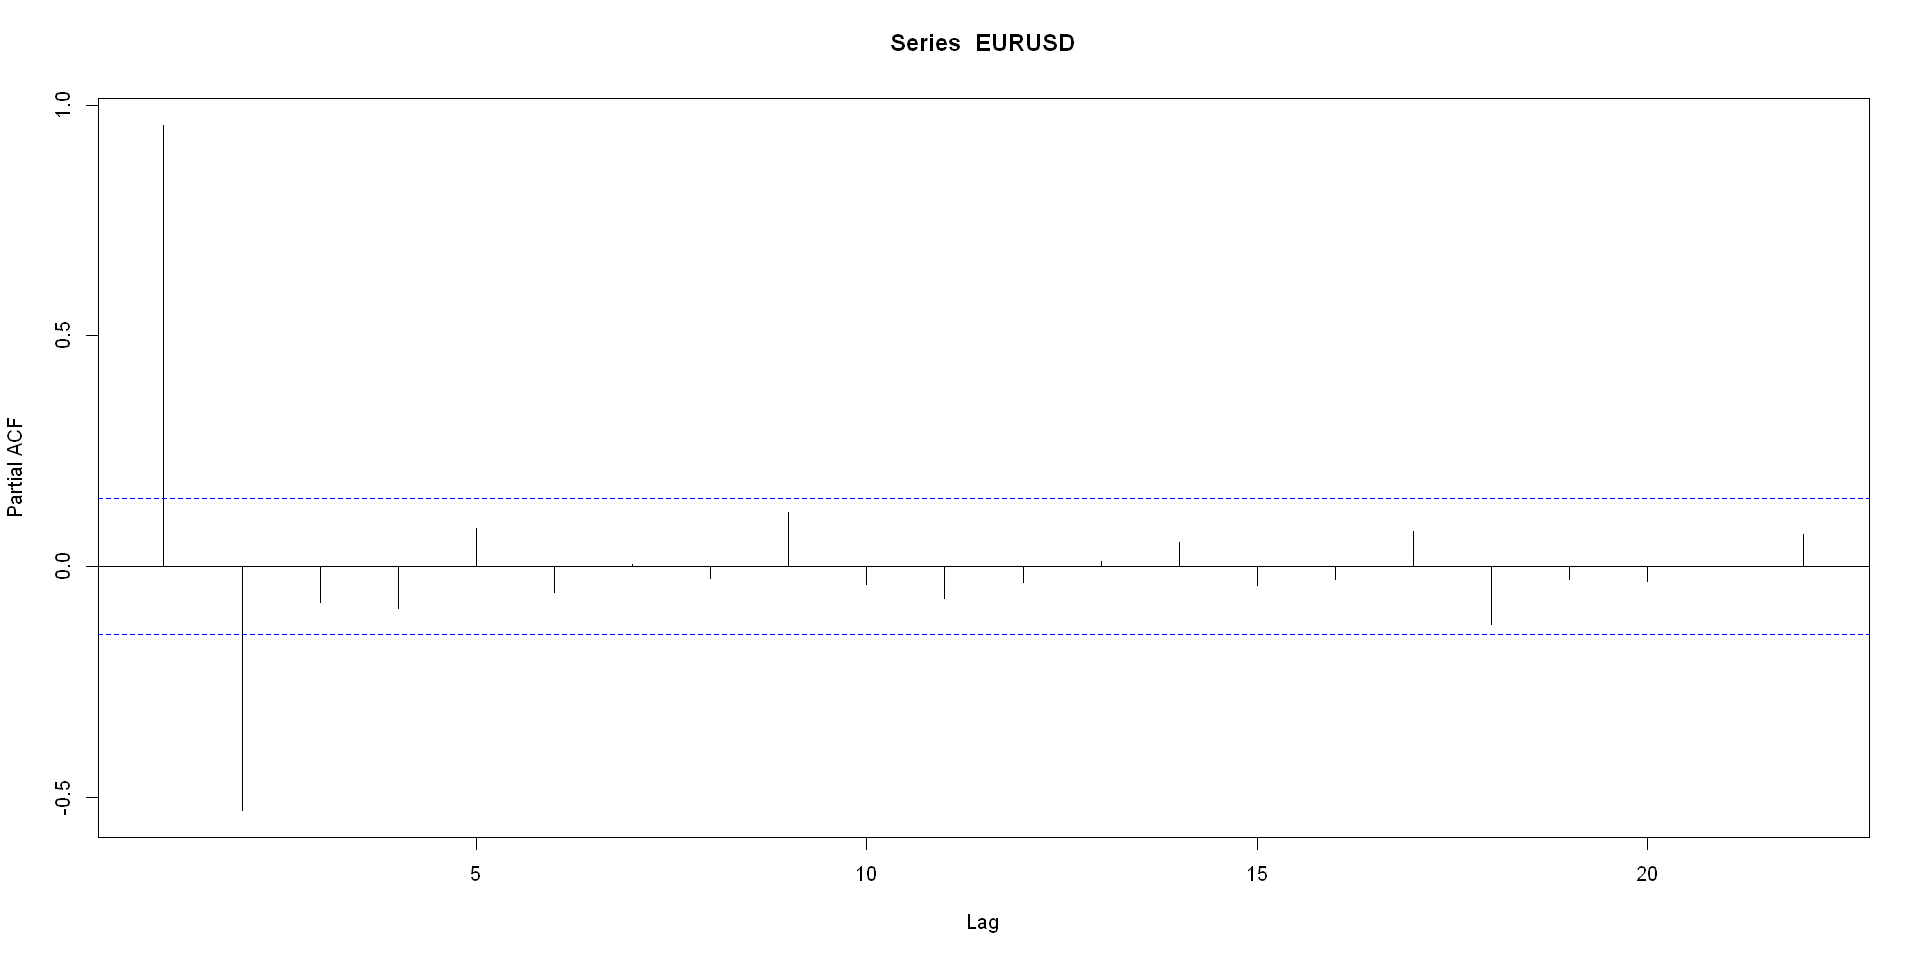

In [108]:
pacf(KO$KO.Close)
pacf(DAX$DAX.Close)
pacf(EURUSD)

In [ ]:
acf(KO_Ret)
acf(DAX_Ret)
acf(EURUSD_Ret)

<div class="alert alert-block alert-info">
<b>Análisis:</b> 
    <br>
    Se evaluó el orden de integración a partir de los resultados del test de Dicker Fuller.
    <br>
    Para Coca cola tiene un orden de integración de 6.
    <br>
    Para el índice bursatil de la bolsa de Alemania tiene un orden de integración de 6.
    <br>
    Para el tipo de cambio EUR a USD tiene un orden de integración de 5.
    <br>
    * Se han evaluado las series desde enero del 2019
    <br>
    <br>
    Al comparar los correlogramas se ve una correlaciómn entre los 3 índices mostrados.
</div>